In [1]:
#libraries
import warnings
warnings.filterwarnings ("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data1 = pd.read_csv("DataFrame.csv")
data1.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [4]:
data1.shape

(22805, 8)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Date        22805 non-null  int64  
 2   Time        22805 non-null  object 
 3   open        22805 non-null  float64
 4   high        22805 non-null  float64
 5   low         22805 non-null  float64
 6   close       22805 non-null  float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
data1.describe()

,Date,open,high,low,close,Unnamed: 7
count,2.280500e+04,22805.000000,22805.000000,22805.000000,22805.000000,0.0
mean,2.021022e+07,14703.322396,14707.486481,14699.102201,14703.260816,NaN
std,8.285616e+01,391.377498,391.265231,391.551643,391.366248,NaN
min,2.021010e+07,13604.750000,13614.400000,13596.750000,13602.800000,NaN
25%,2.021012e+07,14462.250000,14465.950000,14458.050000,14461.950000,NaN
50%,2.021022e+07,14739.500000,14743.000000,14735.850000,14739.450000,NaN
75%,2.021031e+07,15037.000000,15041.250000,15032.500000,15036.850000,NaN
max,2.021033e+07,15429.500000,15431.750000,15427.900000,15430.200000,NaN


## Step 1 : Data Cleaning

In [7]:
data1.isnull().sum()

Type              0
Date              0
Time              0
open              0
high              0
low               0
close             0
Unnamed: 7    22805
dtype: int64

### We've to drop "unnamed: 7 " column

In [8]:
data1.drop("Unnamed: 7",axis=1,inplace=True)

### We've to drop "Type " column

In [9]:
data1.drop("Type",axis=1,inplace=True)

In [37]:
data1.head()

,Date,Time,open,high,low,close
0,1970-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,1970-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,1970-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,1970-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,1970-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [10]:
data1.index

RangeIndex(start=0, stop=22805, step=1)

In [11]:
data1["Date"] = pd.to_datetime(data1["Date"],format="%Y-%m-%d").dt.date
data1.head()

,Date,Time,open,high,low,close
0,1970-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,1970-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,1970-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,1970-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,1970-01-01,09:20,14015.45,14017.80,14011.95,14015.45


## We can see that the data column values have changed to datetime64 type

In [12]:
data1["Date"] = pd.DatetimeIndex(data1.Date)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    22805 non-null  datetime64[ns]
 1   Time    22805 non-null  object        
 2   open    22805 non-null  float64       
 3   high    22805 non-null  float64       
 4   low     22805 non-null  float64       
 5   close   22805 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.0+ MB


In [14]:
data1.Date.value_counts()

1970-01-01    22805
Name: Date, dtype: int64

In [15]:
data1.Time.value_counts()

09:37    61
09:55    61
09:53    61
09:17    61
09:29    61
         ..
15:46     1
16:23     1
16:20     1
16:43     1
16:16     1
Name: Time, Length: 457, dtype: int64

In [16]:
data1.open.value_counts()

14735.10    9
14727.40    8
15108.60    7
15141.75    7
14787.55    7
           ..
15011.85    1
15025.60    1
14643.75    1
15192.90    1
14336.00    1
Name: open, Length: 14944, dtype: int64

In [17]:
data1.high.value_counts()

14584.95    9
15149.25    8
14774.90    7
14762.15    7
14764.35    7
           ..
14725.45    1
14873.30    1
14127.50    1
14857.20    1
13686.65    1
Name: high, Length: 15007, dtype: int64

In [18]:
data1.low.value_counts()

14728.65    9
15130.70    7
14735.00    7
14542.80    7
14728.25    7
           ..
14064.90    1
14749.40    1
14629.00    1
14440.05    1
14372.30    1
Name: low, Length: 15101, dtype: int64

In [19]:
data1.close.value_counts()

14737.95    8
14562.75    7
14736.90    7
14772.85    7
15125.95    7
           ..
13845.45    1
14749.40    1
15383.95    1
14440.05    1
14336.00    1
Name: close, Length: 15036, dtype: int64

In [20]:
data1.duplicated().sum()

0

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    22805 non-null  datetime64[ns]
 1   Time    22805 non-null  object        
 2   open    22805 non-null  float64       
 3   high    22805 non-null  float64       
 4   low     22805 non-null  float64       
 5   close   22805 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.0+ MB


### close price of Data1

[]

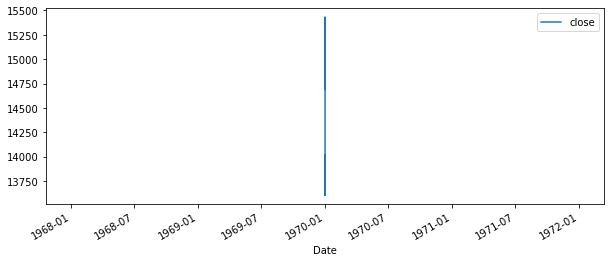

In [22]:
data1.plot(x='Date', y='close',legend=True,figsize=(10,4))
plt.plot()

#### we have stock price for 1970

<AxesSubplot:>

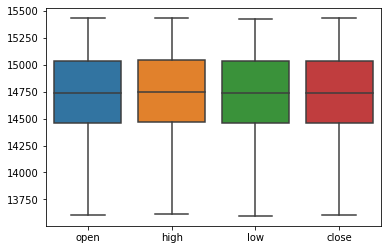

In [23]:
#Importing required modules
import seaborn as sns
import pandas as pd

sns.boxplot(data = data1)


[]

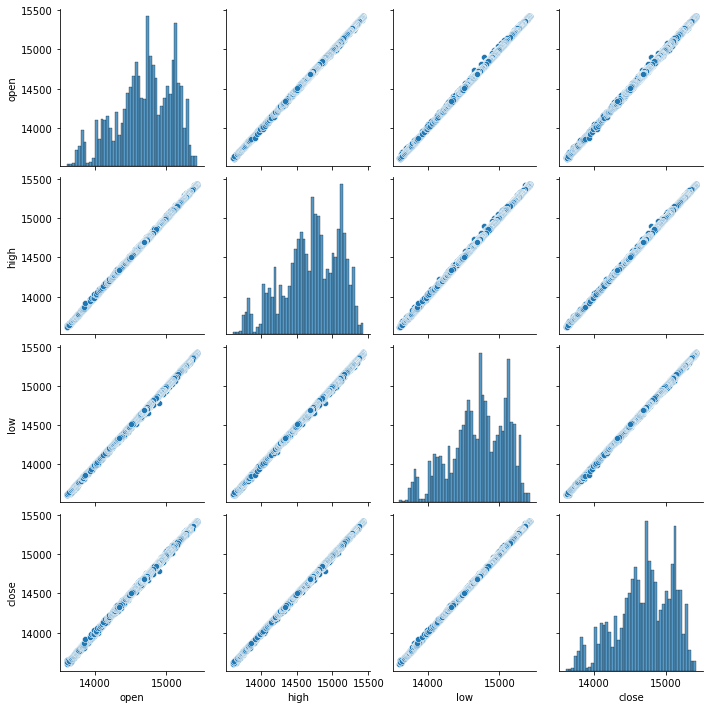

In [24]:
sns.pairplot(data1.dropna())
plt.plot()

In [25]:
Data2 = pd.read_csv("MSFT.csv")
Data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [26]:
Data2.shape

(8857, 7)

In [27]:
Data2.index

RangeIndex(start=0, stop=8857, step=1)

In [28]:
Data2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [29]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


#### We can see that the data column values have changed to datetime64 type

In [30]:
Data2["Date"] = pd.DatetimeIndex(Data2.Date)

In [31]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8857 non-null   datetime64[ns]
 1   Open       8857 non-null   float64       
 2   High       8857 non-null   float64       
 3   Low        8857 non-null   float64       
 4   Close      8857 non-null   float64       
 5   Adj Close  8857 non-null   float64       
 6   Volume     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


## EDA

<AxesSubplot:>

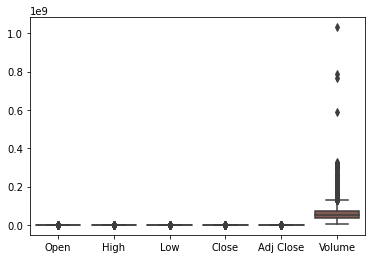

In [32]:
sns.boxplot(data = Data2)

<AxesSubplot:xlabel='Date'>

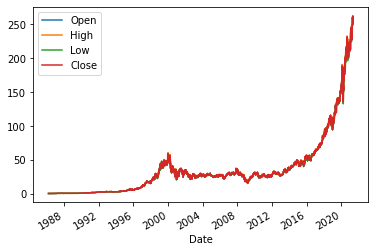

In [33]:
Data2.plot("Date", ["Open", "High", "Low", "Close"])

[]

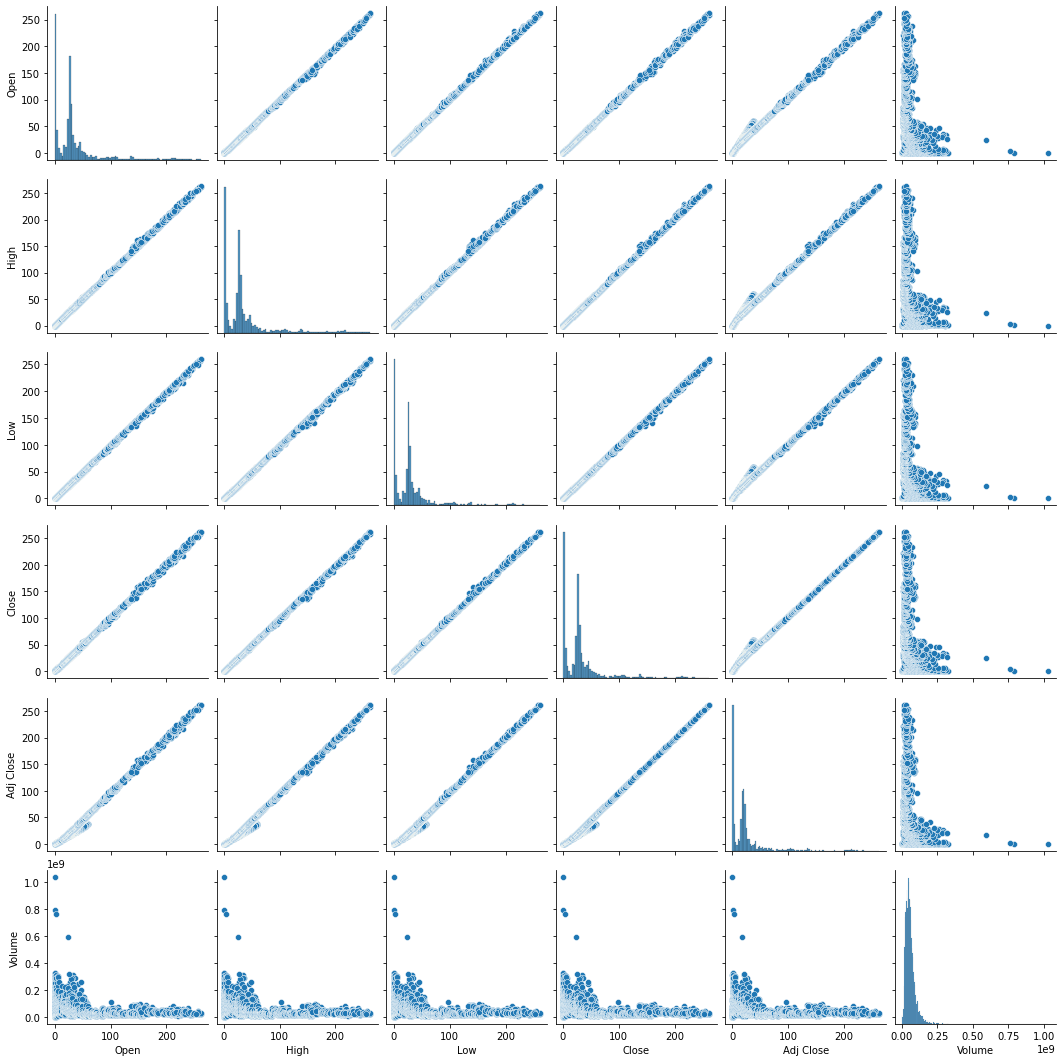

In [34]:
sns.pairplot(Data2.dropna())
plt.plot()

### check if the stock prices are correlated

In [35]:
df=data1['Date'].copy()
df=pd.DataFrame(df)
df['data1']=data1['close']
df['Data2']=Data2['Close']

df.drop(['Date'], axis = 1, inplace = True, errors = 'ignore')

In [38]:
new_data=df.pct_change()
new_data=pd.DataFrame(new_data)
new_data['Date']=data1['Date']
new_data.shape

(22805, 3)

AttributeError: 'JointGrid' object has no attribute 'annot'

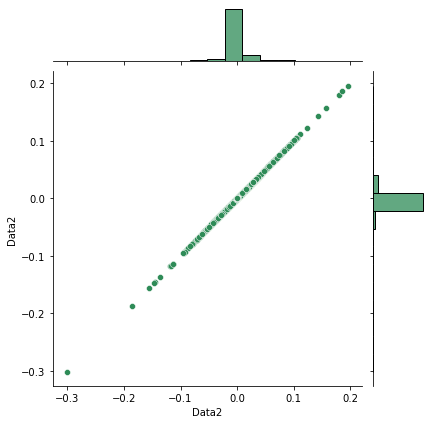

In [39]:
import scipy.stats as stats

sns.jointplot('Data2','Data2',new_data,kind='scatter',color='seagreen').annot(stats.pearsonr)
plt.plot()

## compare data1 and data2

AttributeError: 'JointGrid' object has no attribute 'annotate'

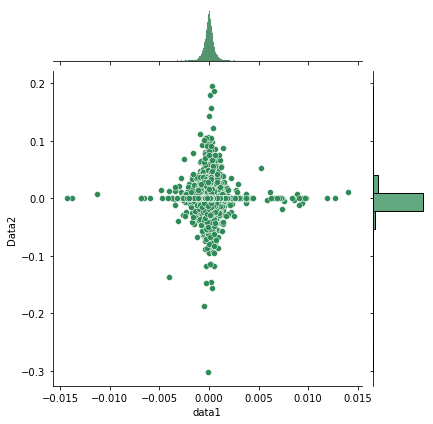

In [42]:
sns.jointplot('data1','Data2',new_data,kind='scatter',color='seagreen').annotate(stats.pearsonr)
plt.plot()

## Heatmap Closing Price¶

[]

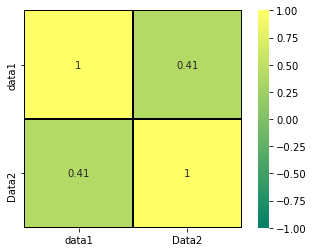

In [43]:
sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.plot()

### All companies have Positive Correlations for Closing Price.